## 1. Importing Essential Libraries

In [80]:
import pandas as pd             # Dataframe operations
import numpy as np              # Numerical computations
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns           # Advanced statistical plots

## 2. Loading the Dataset

In [81]:
# List of paths for all CSV files
files = [
    '../data/raw/all_india/R1.csv',
    '../data/raw/all_india/R2.csv',
    '../data/raw/all_india/R3.csv',
    '../data/raw/all_india/R4.csv',
    '../data/raw/all_india/R5.csv'
]

## 3. Data Merging

Step 1: Concatenation

In [82]:
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

Step 2: Save & Verify

In [83]:
df.to_csv('../data/raw/all_india_combined.csv', index=False)
print(f"Combined Data Shape: {df.shape}")

Combined Data Shape: (2071700, 6)


## 4. Data Verification and Demographic Summary

Cleaning se pehle data ka overview aur key metrics calculate karna

 --- 1. Unique State Verification ---

In [84]:
unique_states = df['state'].unique()
print("Name of unique states:", unique_states)
print("=" * 80)
print("Number of unique states:", (unique_states).size)
print("-" * 80)


Name of unique states: ['Uttar Pradesh' 'Andhra Pradesh' 'Gujarat' 'Rajasthan' 'Karnataka'
 'West Bengal' 'Telangana' 'Odisha' 'Maharashtra' 'Kerala' 'Bihar'
 'Tamil Nadu' 'Madhya Pradesh' 'Assam' 'Tripura' 'Arunachal Pradesh'
 'Punjab' 'Jharkhand' 'Delhi' 'Chandigarh' 'Chhattisgarh'
 'Jammu and Kashmir' 'Mizoram' 'Nagaland' 'Himachal Pradesh' 'Goa'
 'Haryana' 'Meghalaya' 'Uttarakhand' 'Manipur' 'Daman and Diu'
 'Puducherry' 'Sikkim' 'Ladakh' 'Dadra and Nagar Haveli and Daman and Diu'
 'Dadra and Nagar Haveli' 'Orissa' 'Pondicherry'
 'Andaman & Nicobar Islands' 'Andaman and Nicobar Islands' 'west Bengal'
 'Daman & Diu' 'West  Bengal' 'odisha' 'Jammu & Kashmir' 'Lakshadweep'
 'Dadra & Nagar Haveli' 'Westbengal' 'andhra pradesh' 'WEST BENGAL'
 'West Bangal' 'West bengal' 'ODISHA' 'WESTBENGAL' 'Chhatisgarh'
 'West Bengli' 'Darbhanga' 'Puttenahalli' 'BALANAGAR' 'Uttaranchal'
 '100000' 'Jaipur' 'Madanapalle' 'Nagpur' 'Raja Annamalai Puram']
Number of unique states: 65
----------------------

 --- 2. Demographic Calculations (Optimized) ---

Summing columns once and storing in variables for efficiency

In [85]:
total_youth = df['demo_age_5_17'].sum()
total_adults = df['demo_age_17_'].sum()
total_pop = total_youth + total_adults
total_raw = len(df)

 Calculating percentages and population ratio

In [86]:
youth_pct = (total_youth / total_pop) * 100
adult_pct = (total_adults / total_pop) * 100
adults_per_youth = total_adults / total_youth

 --- 3. Summary Report ---

In [87]:
print(f"{'PRE-CLEANING DEMOGRAPHIC SUMMARY':^60}")
print("-" * 60)
print(f"Total Records in Dataset   : {total_raw:,}")
print(f"Total Estimated Population : {total_pop:,.0f}")
print("-" * 60)
print(f"Youth (5-17 years)         : {total_youth:,.0f} ({youth_pct:.2f}%)")
print(f"Adults (17+ years)         : {total_adults:,.0f} ({adult_pct:.2f}%)")
print("-" * 60)
print(f"Youth-to-Adult Ratio       : 1 Youth for every {adults_per_youth:.2f} Adults")
print("-" * 60)

              PRE-CLEANING DEMOGRAPHIC SUMMARY              
------------------------------------------------------------
Total Records in Dataset   : 2,071,700
Total Estimated Population : 49,295,187
------------------------------------------------------------
Youth (5-17 years)         : 4,863,424 (9.87%)
Adults (17+ years)         : 44,431,763 (90.13%)
------------------------------------------------------------
Youth-to-Adult Ratio       : 1 Youth for every 9.14 Adults
------------------------------------------------------------


## 5. Data Standardization (State Name Mapping)

Creating a mapping dictionary to standardize inconsistent state names (handling typos, case sensitivity, and historical name changes).

In [88]:
# Note: Dadra & Nagar Haveli and Daman & Diu are now ONE single UT (Merged in 2020).
# This dictionary maps various spelling variations to a standard name. 
state_name_mapping = {
    'Andhra Pradesh': ['Andhra Pradesh', 'andhra pradesh'],
    'Arunachal Pradesh': ['Arunachal Pradesh'],
    'Andaman and Nicobar Islands': ['Andaman and Nicobar Islands', 'Andaman & Nicobar Islands'],
    'Assam': ['Assam'],
    'Bihar': ['Bihar'],
    'Chhattisgarh': ['Chhattisgarh', 'Chhatisgarh'],
    'Dadra and Nagar Haveli and Daman and Diu': [
        'Dadra and Nagar Haveli and Daman and Diu', 'Dadra and Nagar Haveli', 
        'Dadra & Nagar Haveli', 'Daman and Diu', 'Daman & Diu'],
    'Goa': ['Goa'],
    'Gujarat': ['Gujarat'],
    'Haryana': ['Haryana'],
    'Himachal Pradesh': ['Himachal Pradesh'],
    'Jharkhand': ['Jharkhand'],
    'Karnataka': ['Karnataka'],
    'Kerala': ['Kerala'],
    'Madhya Pradesh': ['Madhya Pradesh'],
    'Maharashtra': ['Maharashtra'],
    'Manipur': ['Manipur'],
    'Meghalaya': ['Meghalaya'],
    'Mizoram': ['Mizoram'],
    'Nagaland': ['Nagaland'],
    'Odisha': ['Odisha', 'odisha', 'ODISHA', 'Orissa'],
    'Punjab': ['Punjab'],
    'Rajasthan': ['Rajasthan'],
    'Sikkim': ['Sikkim'],
    'Tamil Nadu': ['Tamil Nadu'],
    'Telangana': ['Telangana'],
    'Tripura': ['Tripura'],
    'Uttar Pradesh': ['Uttar Pradesh'],
    'Uttarakhand': ['Uttarakhand', 'Uttaranchal'],
    'West Bengal': [
        'West Bengal', 'west Bengal', 'West  Bengal', 'Westbengal', 
        'WEST BENGAL', 'West Bangal', 'West bengal', 'WESTBENGAL', 'West Bengli'
    ],
    'Delhi': ['Delhi'],
    'Puducherry': ['Puducherry', 'Pondicherry'],
    'Jammu and Kashmir': ['Jammu and Kashmir', 'Jammu & Kashmir'],
    'Ladakh': ['Ladakh'],
    'Lakshadweep': ['Lakshadweep']
}

## 6. City-to-State Reference Mapping

Defining a lookup dictionary to impute missing state values based on known city locations.

In [89]:
# Mapping specific cities to their respective states for data imputation
# This helps in filling missing state values where city information is available
city_to_state_mapping = {
    'Madanapalle': 'Andhra Pradesh',
    'Darbhanga': 'Bihar',
    'Puttenahalli': 'Karnataka',
    'BALANAGAR': 'Karnataka',
    'Nagpur': 'Maharashtra',
    'Jaipur': 'Rajasthan',
    'Raja Annamalai Puram': 'Tamil Nadu'
}

## 7. Data Cleaning & Geographic Standardization

Implementing a multi-step cleaning process to remove numeric noise, allocate cities to states, and standardize inconsistent state names using pre-defined mapping dictionaries.

 --- Step 1: Removing Numeric Noise ---

In [90]:
# Filtering out invalid numeric entries from the state column
df = df[df['state'] != '100000']

--- Step 2: City-to-State Allocation ---

Replacing specific city names with their respective parent states

In [91]:
# .str.strip() ensures that leading/trailing whitespaces don't affect the mapping
df['state'] = df['state'].str.strip().replace(city_to_state_mapping)

--- Step 3: State Name Standardization ---

In [92]:
# Flattening the state_name_mapping dictionary for efficient processing
# This maps all spelling variants to a single standard name
clean_map = {}
for standard_name, variants in state_name_mapping.items():
    for variant in variants:
        clean_map[variant] = standard_name

Applying the standardized mapping

In [93]:
# .fillna(df['state']) ensures that names not in the dictionary remain unchanged
df['state'] = df['state'].map(clean_map).fillna(df['state'])

--- Final Verification ---

In [94]:
print("--- Data Allocation & Merging Completed ---")
print(f"Total Records in Dataset: {total_raw:,}")
print(f"Total pop noise removed: {total_raw - len(df):,}")
print(f"Total Records Remaining: {len(df):,}")
print(f"Unique States/UTs after cleaning: {df['state'].nunique()}")

--- Data Allocation & Merging Completed ---
Total Records in Dataset: 2,071,700
Total pop noise removed: 2
Total Records Remaining: 2,071,698
Unique States/UTs after cleaning: 36


## 8. Pre-Cleaning Data Validation

Comparing the dataset metrics before removing numeric noise and after the cleaning process to ensure data integrity and track changes.

--- 1. Calculating Post-Cleaning Metrics ---

In [95]:
# Recalculating totals after removing numeric noise and standardizing states
pre_youth = df['demo_age_5_17'].sum()
pre_adults = df['demo_age_17_'].sum()
pre_total_pop = pre_youth + pre_adults

--- 2. Generating Comparison Report ---

In [96]:
print("\n" + "="*80)
print(f"{'PRE-CLEANING KEY METRICS COMPARISON':^80}")
print("="*80)

# Comparing totals to see the impact of noise removal
pop_diff = total_pop - pre_total_pop
print(f"Population Reduction (Noise Removed) : {pop_diff:,.0f}")
print("-" * 80)

# Detailed Comparison: Post-Cleaning vs Baseline (total_pop, etc. were saved earlier)
print(f"Total Population    : {pre_total_pop:,.0f} (Baseline: {total_pop:,.0f})")
print(f"Total Youth (5-17)  : {pre_youth:,.0f} (Baseline: {pre_youth:,.0f})")
print(f"Total Adults (17+)  : {pre_adults:,.0f} (Baseline: {pre_adults:,.0f})")
print("-" * 80)

# Dataset Structure
print(f"Final Dataset Shape : {df.shape}")
print("="*80)


                      PRE-CLEANING KEY METRICS COMPARISON                       
Population Reduction (Noise Removed) : 2
--------------------------------------------------------------------------------
Total Population    : 49,295,185 (Baseline: 49,295,187)
Total Youth (5-17)  : 4,863,424 (Baseline: 4,863,424)
Total Adults (17+)  : 44,431,761 (Baseline: 44,431,761)
--------------------------------------------------------------------------------
Final Dataset Shape : (2071698, 6)


## 9. In-depth Duplication Analysis

In [97]:
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates:,}")


Duplicates: 474,305


Performing a multi-method check to identify redundant records. This ensures high data quality by distinguishing between unique rows and total duplicated occurrences.

--- Professional Duplicate Audit Report ---

In [98]:
print("="*70)
print(f"{'DETAILED DUPLICATE VERIFICATION':^70}")
print("="*70)

# 1. Total records currently in the dataframe
current_total = len(df)
print(f"Total records in dataset          : {current_total:,}")

# 2. Identifying redundant rows (Method 1: Standard Count)
# This counts extra copies that need to be removed
duplicates_to_remove = df.duplicated().sum()
print(f"Redundant rows to be removed      : {duplicates_to_remove:,}")

# 3. Identifying all rows affected (Method 2: Full Impact)
# This includes the original row + all its copies
duplicates_all = df.duplicated(keep=False).sum()
print(f"Total rows impacted by duplication: {duplicates_all:,}")

# 4. Final Unique Count projection
unique_rows = current_total - duplicates_to_remove
print(f"Projected unique rows             : {unique_rows:,}")

# 5. Duplication rate calculation
dup_percentage = (duplicates_to_remove / current_total) * 100
print(f"Overall Duplication Rate          : {dup_percentage:.2f}%")
print("="*70)

                   DETAILED DUPLICATE VERIFICATION                    
Total records in dataset          : 2,071,698
Redundant rows to be removed      : 474,305
Total rows impacted by duplication: 948,205
Projected unique rows             : 1,597,393
Overall Duplication Rate          : 22.89%


## 10. Duplicate Evidence & Column-wise Verification

Manually inspecting sample duplicates and their original counterparts to verify that the duplication occurs across all administrative and demographic columns.

--- Sample Duplicate Evidence ---

In [99]:
print("="*70)
print(f"{'DUPLICATE SAMPLE INSPECTION':^70}")
print("="*70)

if duplicates_to_remove > 0:
    # Identifying the first redundant row (excluding its original)
    dup_mask = df.duplicated(keep='first')
    first_dup = df[dup_mask].iloc[0]
    
    print("\n[Target Redundant Row]:")
    print(first_dup)
    
    # Locating all occurrences of this specific data across the dataset
    # We use a combined mask to ensure every column matches exactly
    match_mask = True
    for col in df.columns:
        match_mask &= (df[col] == first_dup[col])
    
    matches = df[match_mask]
    
    print("-" * 70)
    print(f"Audit Result: Found {len(matches)} occurrences of the exact same data.")
    print("Listing all matching records:")
    print(matches)
    print("\nCONCLUSION: All columns match perfectly. Data redundancy confirmed.")
else:
    print("Verification Success: No duplicate records detected in the dataset.")

print("="*70)

# --- Final Data Integrity Summary ---
print(f"{'FINAL INTEGRITY SUMMARY':^70}")
print("-" * 70)
print(f"Total Current Records   : {len(df):,}")
print(f"Unique Rows Projection  : {df.drop_duplicates().shape[0]:,}")
print(f"Total Redundant Copies  : {df.duplicated().sum():,}")
print(f"Verified Columns ({len(df.columns)}) : {', '.join(df.columns)}")
print("="*70)

                     DUPLICATE SAMPLE INSPECTION                      

[Target Redundant Row]:
date             01-09-2025
state                Odisha
district            Jajapur
pincode              755050
demo_age_5_17             0
demo_age_17_              1
Name: 6366, dtype: object
----------------------------------------------------------------------
Audit Result: Found 2 occurrences of the exact same data.
Listing all matching records:
            date   state district  pincode  demo_age_5_17  demo_age_17_
6228  01-09-2025  Odisha  Jajapur   755050              0             1
6366  01-09-2025  Odisha  Jajapur   755050              0             1

CONCLUSION: All columns match perfectly. Data redundancy confirmed.
                       FINAL INTEGRITY SUMMARY                        
----------------------------------------------------------------------
Total Current Records   : 2,071,698
Unique Rows Projection  : 1,597,393
Total Redundant Copies  : 474,305
Verified Columns (

## CLEAN-DATA LOADING

In [100]:
df_cleaned = pd.read_csv("../Data/processed/all_india_cleaned_unique.csv")

## 11. Visualizing Data Redundancy

Generating a pie chart to visually represent the ratio between unique records and identified duplicates within the consolidated dataset.

--- Visualizing Duplicate vs Unique Records ---

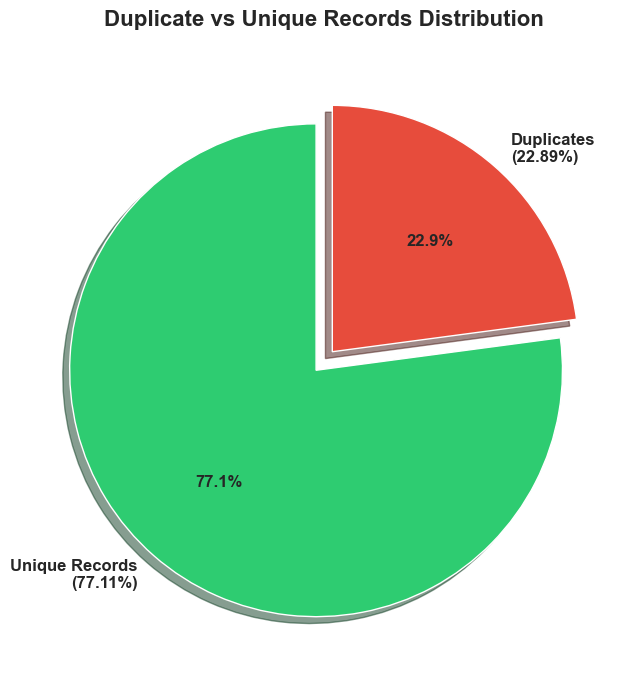

Visualization successfully exported to: ../visuals/charts/duplicate_breakdown.png


In [101]:
# Data for the pie chart based on previous audit results
sizes = [1597393, 474307]
labels = ['Unique Records\n(77.11%)', 'Duplicates\n(22.89%)']
colors = ['#2ecc71', '#e74c3c'] # Green for Clean, Red for Duplicates
explode = (0.05, 0.05)           # To slightly separate the slices

# Initializing the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Creating the Pie Chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    explode=explode, 
    labels=labels,
    colors=colors, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Adding professional styling
ax.set_title('Duplicate vs Unique Records Distribution', 
             fontsize=16, fontweight='bold', pad=20)

# Saving the visualization for the final report
output_path = '../visuals/charts/duplicate_breakdown.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Displaying the chart
plt.show()

print(f"Visualization successfully exported to: {output_path}")

## 12. State-level Performance Analysis

--- Step 1: Feature Engineering ---

In [102]:
# Creating a unified metric for total activity
df_cleaned['total_updates'] = df_cleaned['demo_age_5_17'] + df_cleaned['demo_age_17_']
print(f"Total population {df_cleaned['total_updates'].sum():,.0f}")

Total population 36,596,428


--- Step 2: Data Aggregation ---

In [103]:
# Calculating cumulative updates per state
state_performance = df_cleaned.groupby('state')['total_updates'].sum().sort_values(ascending=False)
top_10_states = state_performance.head(10)

--- Step 3: Visualization Setup ---

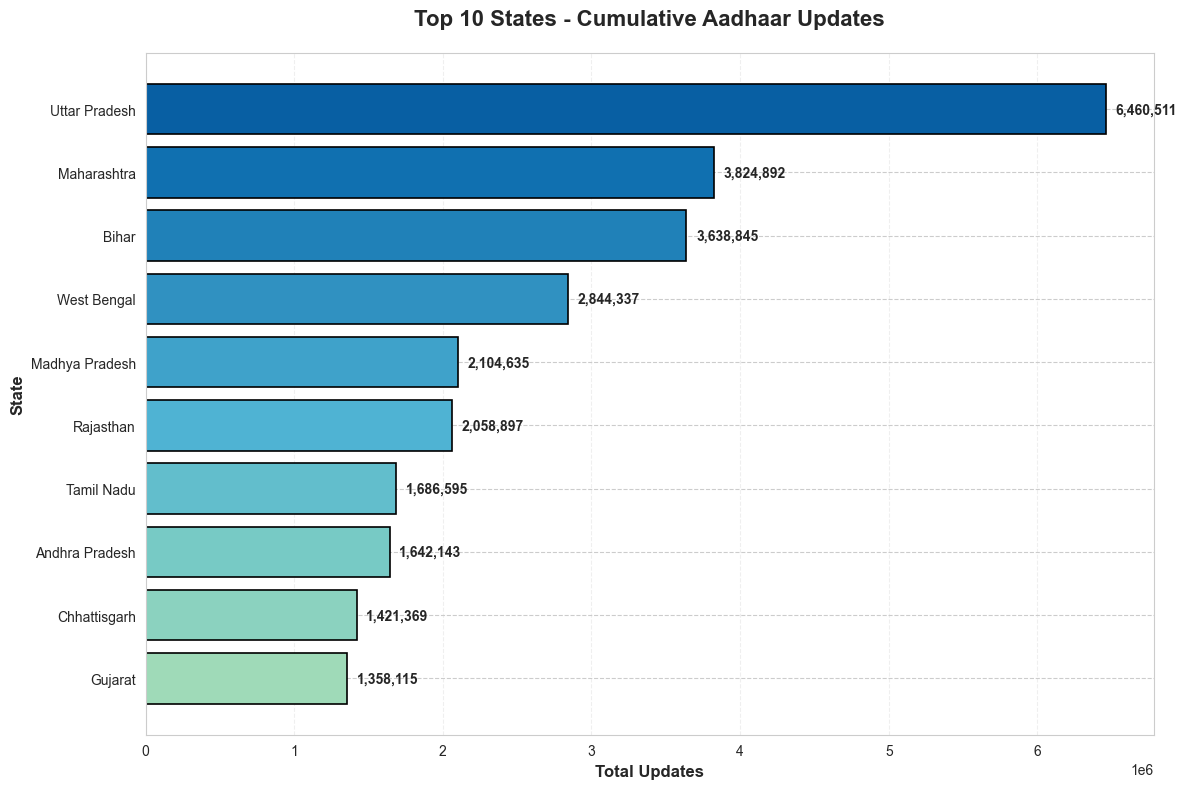

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))

# Using GnBu (Green-Blue) colormap for a professional aesthetic
colors = plt.cm.GnBu(np.linspace(0.4, 0.9, 10))

# Plotting (Reversed index to show highest on top)
bars = ax.barh(top_10_states.index[::-1], top_10_states.values[::-1], 
               color=colors, edgecolor='black', linewidth=1.2)

# Chart Polishing
ax.set_title('Top 10 States - Cumulative Aadhaar Updates', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Total Updates', fontsize=12, fontweight='bold')
ax.set_ylabel('State', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Adding Precise Data Labels
for i, v in enumerate(top_10_states.values[::-1]):
    ax.text(v + (top_10_states.max() * 0.01), i, f'{v:,.0f}', 
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()

output_file = '../visuals/charts/top_10_states.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

--- Step 5: Statistical Summary Report ---

In [105]:
print(f"\n{'TOP 10 STATE PERFORMANCE RANKING':^50}")
print("="*50)
for rank, (state, total) in enumerate(top_10_states.items(), 1):
    # Calculating contribution of each state relative to national total
    contribution = (total / state_performance.sum()) * 100
    print(f"{rank:2d}. {state:25} | {total:12,.0f} ({contribution:.1f}%)")
print("="*50)


         TOP 10 STATE PERFORMANCE RANKING         
 1. Uttar Pradesh             |    6,460,511 (17.7%)
 2. Maharashtra               |    3,824,892 (10.5%)
 3. Bihar                     |    3,638,845 (9.9%)
 4. West Bengal               |    2,844,337 (7.8%)
 5. Madhya Pradesh            |    2,104,635 (5.8%)
 6. Rajasthan                 |    2,058,897 (5.6%)
 7. Tamil Nadu                |    1,686,595 (4.6%)
 8. Andhra Pradesh            |    1,642,143 (4.5%)
 9. Chhattisgarh              |    1,421,369 (3.9%)
10. Gujarat                   |    1,358,115 (3.7%)


## 13. Granular Analysis: Top 10 District Hotspots

Identifying specific administrative districts with the highest concentration of Aadhaar update activity.


📊 TOP 10 DISTRICT HOTSPOTS:
 1. Thane                     |    326,749 updates
 2. Pune                      |    326,083 updates
 3. South 24 Parganas         |    300,104 updates
 4. Murshidabad               |    263,029 updates
 5. Surat                     |    257,237 updates
 6. Bengaluru                 |    221,322 updates
 7. North West Delhi          |    217,905 updates
 8. North 24 Parganas         |    210,114 updates
 9. Solapur                   |    199,966 updates
10. Ahmedabad                 |    198,239 updates


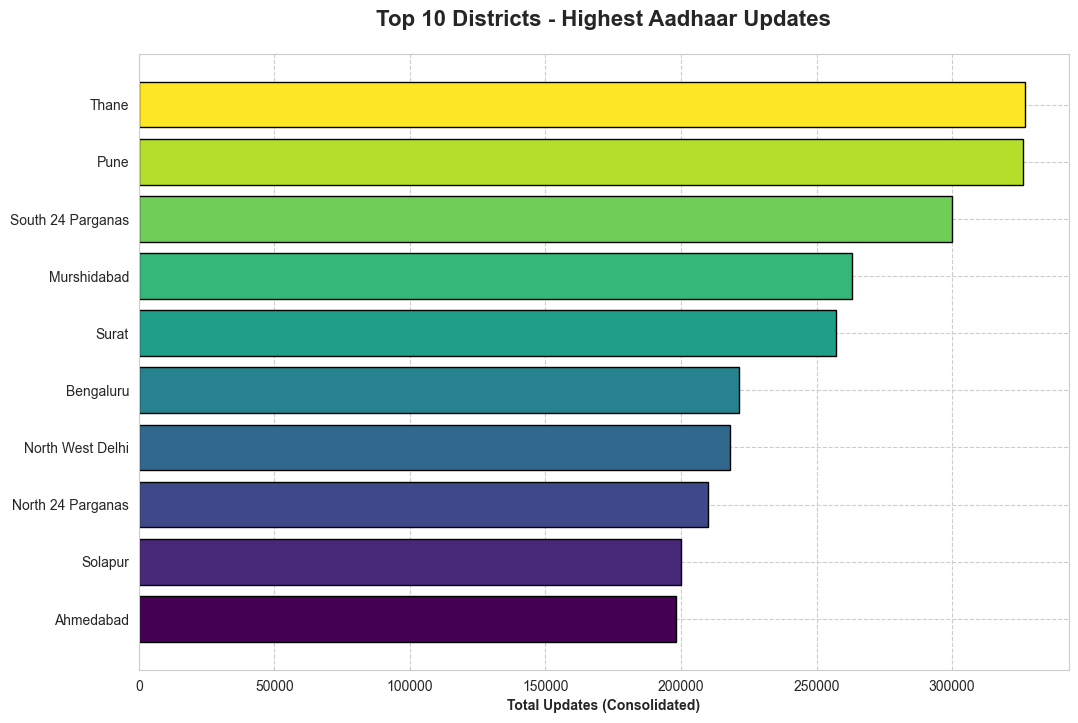

In [106]:
# --- District-wise Update Concentration ---
df_cleaned['total_updates'] = df_cleaned['demo_age_5_17'] + df_cleaned['demo_age_17_']
top_districts = df_cleaned.groupby('district')['total_updates'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 8))

# Using Viridis for a scientific color scale
bars = ax.barh(top_districts.sort_values().index, top_districts.sort_values().values, 
               color=plt.cm.viridis(np.linspace(0, 1, 10)), edgecolor='black')

ax.set_title('Top 10 Districts - Highest Aadhaar Updates', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Total Updates (Consolidated)', fontweight='bold')

# Statistical Summary Printout
print("\n📊 TOP 10 DISTRICT HOTSPOTS:")
print("="*60)
for rank, (district, count) in enumerate(top_districts.items(), 1):
    print(f"{rank:2d}. {district:25} | {count:10,.0f} updates")


output_file = '../visuals/charts/top_10_districts.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

## 15. Standardized Regional Mapping

1. Defining mapping based on your provided clean state list


In [107]:
region_mapping = {
    'North': ['Delhi', 'Punjab', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Uttarakhand', 'Rajasthan'],
    'East': ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal'],
    'South': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana', 'Puducherry', 'Lakshadweep', 'Andaman and Nicobar Islands'],
    'West': ['Gujarat', 'Maharashtra', 'Goa', 'Dadra and Nagar Haveli and Daman and Diu'],
    'Central': ['Madhya Pradesh', 'Chhattisgarh', 'Uttar Pradesh'],
    'Northeast': ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
}

2. Inverting for mapping

In [108]:
state_to_region = {state: region for region, states in region_mapping.items() for state in states}

3. Applying to the cleaned dataset only


In [109]:
df_cleaned['region'] = df_cleaned['state'].map(state_to_region).fillna('Other')

4. Calculating totals (This will now match your 36.5M count)

In [110]:
regional_stats = df_cleaned.groupby('region')['total_updates'].sum().sort_values(ascending=False)

 --- Visualization Setup ---

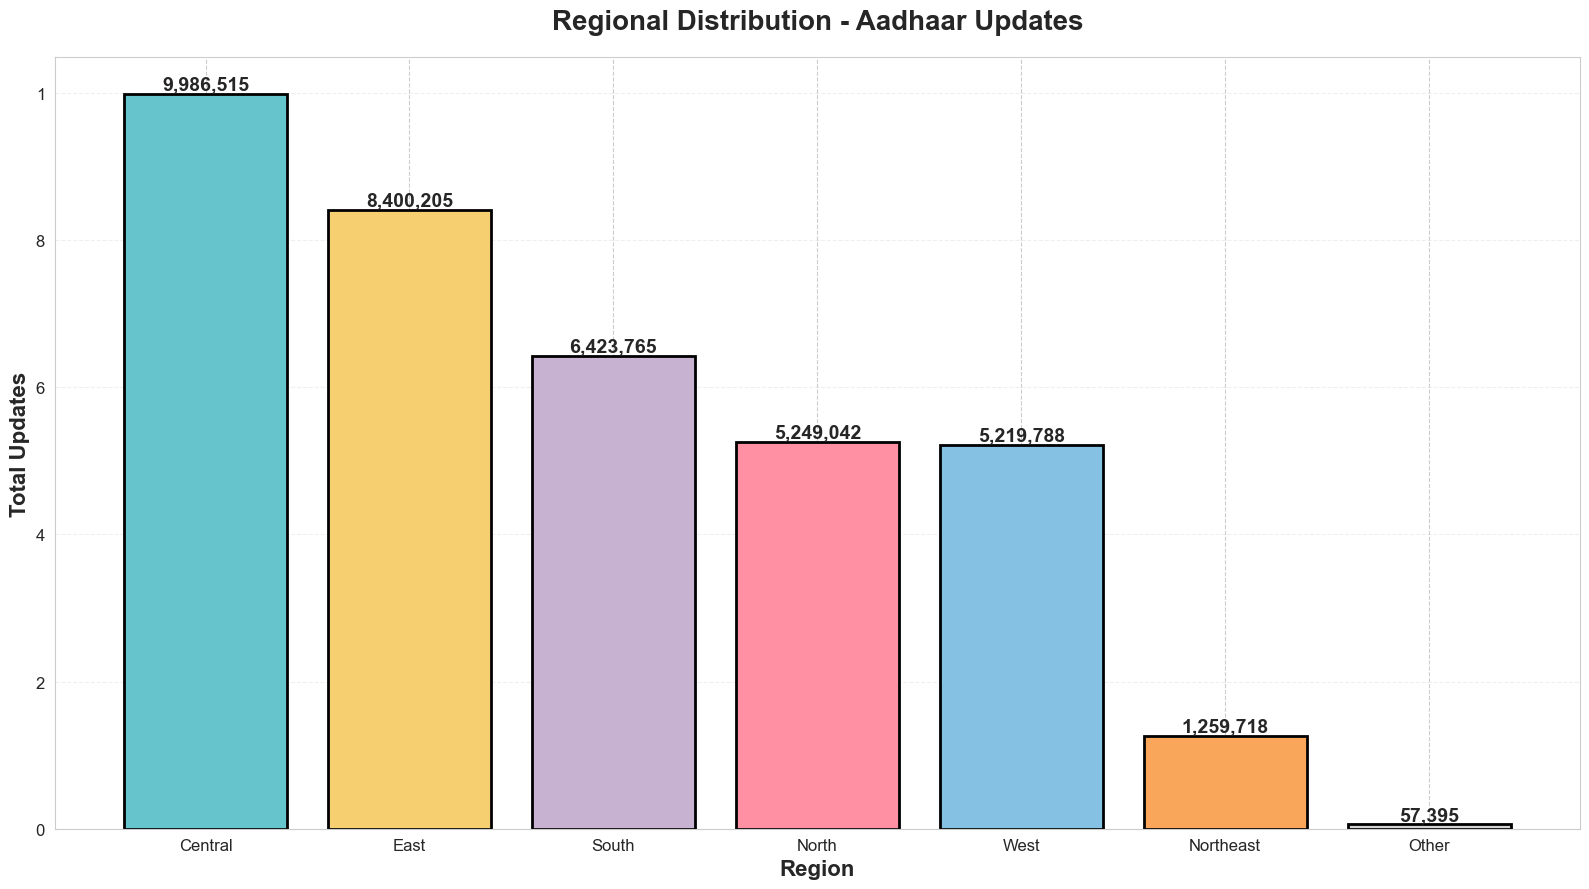


 REGIONAL AADHAAR UPDATE STATISTICS:
Central            9,986,515 updates (27.29%)
East               8,400,205 updates (22.95%)
South              6,423,765 updates (17.55%)
North              5,249,042 updates (14.34%)
West               5,219,788 updates (14.26%)
Northeast          1,259,718 updates ( 3.44%)
Other                 57,395 updates ( 0.16%)
TOTAL             36,596,428 updates (100.00%)


In [118]:
# Visualization
fig, ax = plt.subplots(figsize=(16, 9))

# Define colors for each region
colors = ['#66C5CC', '#F6CF71', '#C8B2D1', '#FF8FA3', '#85C1E2', '#F9A65A', '#D3D3D3']

bars = ax.bar(regional_stats.index, regional_stats.values, 
              color=colors[:len(regional_stats)], 
              edgecolor='black', linewidth=2)

# Add value labels on top of bars
for bar, value in zip(bars, regional_stats.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(value):,}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
ax.set_xlabel('Region', fontsize=16, fontweight='bold')
ax.set_ylabel('Total Updates', fontsize=16, fontweight='bold')
ax.set_title('Regional Distribution - Aadhaar Updates', fontsize=20, fontweight='bold', pad=20)
ax.tick_params(axis='both', labelsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e7)}' if x >= 1e7 else f'{int(x/1e6)}'))

plt.tight_layout()
plt.savefig('../visuals/charts/regional_distribution_aadhaar_updates.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print statistics
print("\n REGIONAL AADHAAR UPDATE STATISTICS:")
print("="*80)
for region, count in regional_stats.items():
    percentage = (count / regional_stats.sum()) * 100
    print(f"{region:15} {count:>12,} updates ({percentage:>5.2f}%)")
print("="*80)
print(f"{'TOTAL':15} {regional_stats.sum():>12,} updates (100.00%)")

## 17. Demographic Split: Children vs Adults

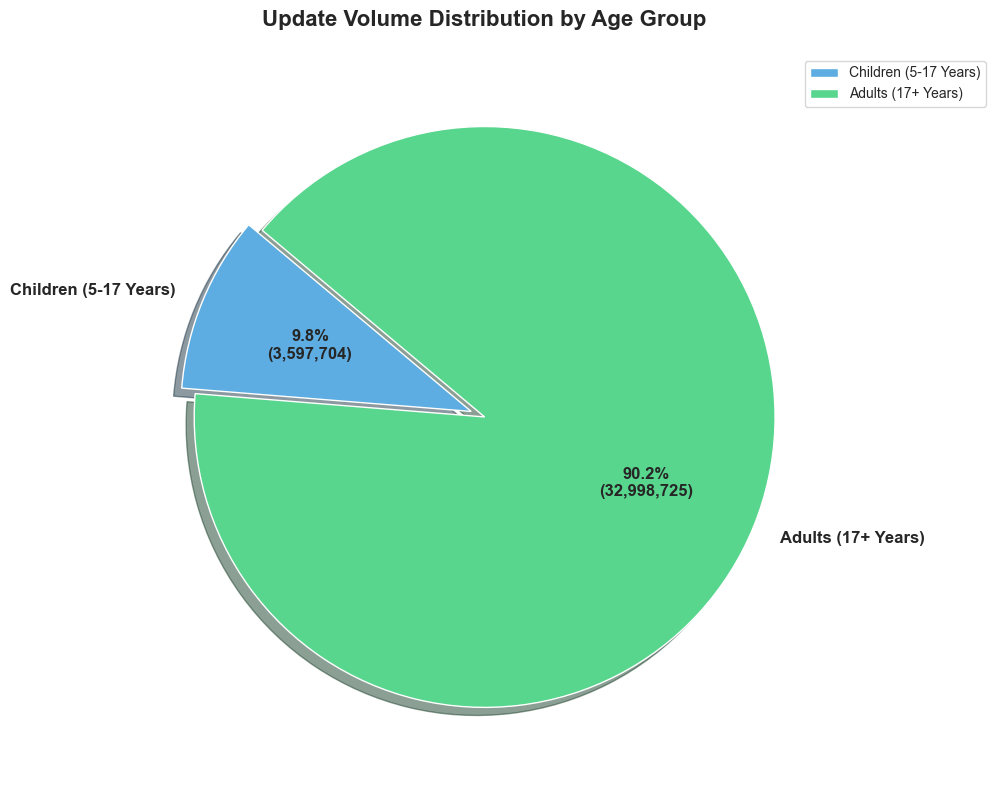

In [115]:
# 1. Calculating totals from cleaned data
child_total = df_cleaned["demo_age_5_17"].sum()
adult_total = df_cleaned["demo_age_17_"].sum()

labels = ['Children (5-17 Years)', 'Adults (17+ Years)']
values = [child_total, adult_total]
colors = ['#5dade2', '#58d68d'] # Professional Blue and Green

# 2. Function to display both Absolute Number and Percentage
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute:,})"

# 3. Plotting
plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values),
        startangle=140, colors=colors, explode=(0.05, 0), 
        textprops={'fontsize': 12, 'fontweight': 'bold'}, shadow=True)

plt.title('Update Volume Distribution by Age Group', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.savefig('../visuals/charts/age_group_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Highest Duplicate Entry Counts

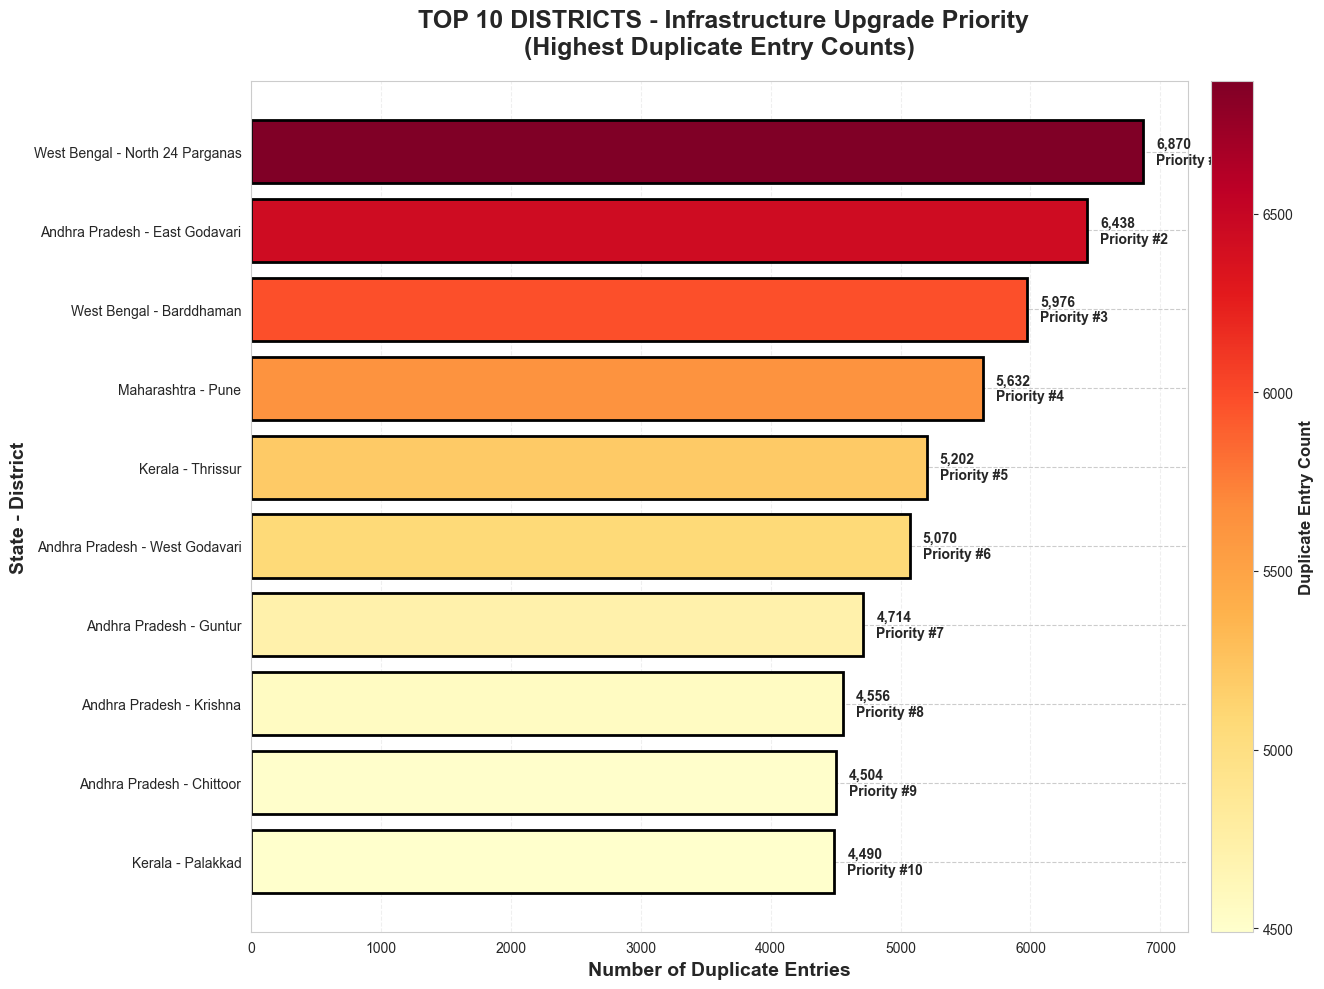


 TOP 10 CRITICAL DISTRICTS:
Priority # 1: West Bengal - North 24 Parganas                     6,870 duplicates
Priority # 2: Andhra Pradesh - East Godavari                      6,438 duplicates
Priority # 3: West Bengal - Barddhaman                            5,976 duplicates
Priority # 4: Maharashtra - Pune                                  5,632 duplicates
Priority # 5: Kerala - Thrissur                                   5,202 duplicates
Priority # 6: Andhra Pradesh - West Godavari                      5,070 duplicates
Priority # 7: Andhra Pradesh - Guntur                             4,714 duplicates
Priority # 8: Andhra Pradesh - Krishna                            4,556 duplicates
Priority # 9: Andhra Pradesh - Chittoor                           4,504 duplicates
Priority #10: Kerala - Palakkad                                   4,490 duplicates


In [ ]:
duplicate_columns = ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']  # Adjust according to your data

# Mark duplicates
df['is_duplicate'] = df.duplicated(subset=duplicate_columns, keep=False)

# Step 2: Ab duplicates filter karo
duplicates_only = df[df['is_duplicate'] == True]

# Step 3: District-wise count
district_counts = duplicates_only.groupby(['state', 'district']).size().reset_index(name='dup_count')

# Step 4: Visualization ke liye prepare karo
duplicates_df = duplicates_only.copy()
duplicates_df['state_district'] = duplicates_df['state'] + ' - ' + duplicates_df['district']
critical_districts = duplicates_df['state_district'].value_counts().head(10)

# Baaki ka plotting code same rahega
fig, ax = plt.subplots(figsize=(14, 10))

norm = plt.Normalize(critical_districts.min(), critical_districts.max())
colors = plt.cm.YlOrRd(norm(critical_districts.sort_values().values))

bars = ax.barh(critical_districts.sort_values().index,
               critical_districts.sort_values().values,
               color=colors, edgecolor='black', linewidth=2)

ax.set_title(' TOP 10 DISTRICTS - Infrastructure Upgrade Priority\n(Highest Duplicate Entry Counts)', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Number of Duplicate Entries', fontsize=14, fontweight='bold')
ax.set_ylabel('State - District', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

for i, (district, count) in enumerate(zip(critical_districts.sort_values().index,
                                           critical_districts.sort_values().values)):
    priority = len(critical_districts) - i
    ax.text(count + 100, i, f'{count:,}\nPriority #{priority}', 
            va='center', fontsize=10, fontweight='bold')

sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Duplicate Entry Count', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../visuals/charts/infrastructure_priority_districts.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n TOP 10 CRITICAL DISTRICTS:")
print("="*70)
for rank, (district, count) in enumerate(critical_districts.items(), 1):
    print(f"Priority #{rank:2}: {district:50} {count:>6,} duplicates")